In [ ]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Carregando dados

In [ ]:
#filtragem de colunas
colunas_desejadas = ["Player", "Pos", "Squad", "Comp", "Gls", "Ast", "G+A", "Saves", "Tkl+Int", "KP"]

#lendo dados do arquivo csv
df = pd.read_csv(r"players_data_light-2024_2025.csv", usecols=colunas_desejadas)

df

,Player,Pos,Squad,Comp,Gls,Ast,G+A,KP,Tkl+Int,Saves
0,Max Aarons,DF,Bournemouth,eng Premier League,0,0,0,0,3,NaN
1,Max Aarons,"DF,MF",Valencia,es La Liga,0,0,0,1,4,NaN
2,Rodrigo Abajas,DF,Valencia,es La Liga,0,0,0,0,4,NaN
3,James Abankwah,"DF,MF",Udinese,it Serie A,0,0,0,0,5,NaN
4,Keyliane Abdallah,FW,Marseille,fr Ligue 1,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
2849,Edhy Zuliani,DF,Toulouse,fr Ligue 1,0,0,0,0,1,NaN
2850,Szymon Żurkowski,MF,Empoli,it Serie A,0,0,0,0,7,NaN
2851,Martin Ødegaard,MF,Arsenal,eng Premier League,3,8,11,63,25,NaN
2852,Milan Đurić,FW,Monza,it Serie A,4,1,5,5,3,NaN


In [4]:
#quantidade de jogadores por liga
print("\nJogadores por liga: ")
print(df["Comp"].value_counts())

#quantidade de jogadores por posição
print("\nDistribuição de posições: ")
print(df["Pos"].value_counts())


Jogadores por liga: 
Comp
it Serie A            634
es La Liga            601
eng Premier League    574
fr Ligue 1            553
de Bundesliga         492
Name: count, dtype: int64

Distribuição de posições: 
Pos
DF       859
MF       589
FW       371
FW,MF    325
MF,FW    230
GK       212
DF,MF    110
MF,DF     81
DF,FW     53
FW,DF     24
Name: count, dtype: int64


In [ ]:
#manipulação de string
s = "DF,MF"
s.split(",")[0] #pegando o primeiro elemento(posição principal do jogador)

['DF', 'MF']

In [7]:
#ajustando posição principal
df["Pos"] = df["Pos"].apply(lambda pos: pos.split(",")[0])

print("\nDistribuição de posições: ")
print(df["Pos"].value_counts())


Distribuição de posições: 
Pos
DF    1022
MF     900
FW     720
GK     212
Name: count, dtype: int64


                  Player          Squad                Comp Pos  G+A
2304       Mohamed Salah      Liverpool  eng Premier League  FW   47
1317          Harry Kane  Bayern Munich       de Bundesliga  FW   35
1691       Kylian Mbappé    Real Madrid          es La Liga  FW   34
2201       Mateo Retegui       Atalanta          it Serie A  FW   33
1219      Alexander Isak  Newcastle Utd  eng Premier League  FW   29
1483  Robert Lewandowski      Barcelona          es La Liga  FW   29
1960       Michael Olise  Bayern Munich       de Bundesliga  FW   27
2177            Raphinha      Barcelona          es La Liga  FW   27
697      Ousmane Dembélé      Paris S-G          fr Ligue 1  FW   27
1693        Bryan Mbeumo      Brentford  eng Premier League  FW   27


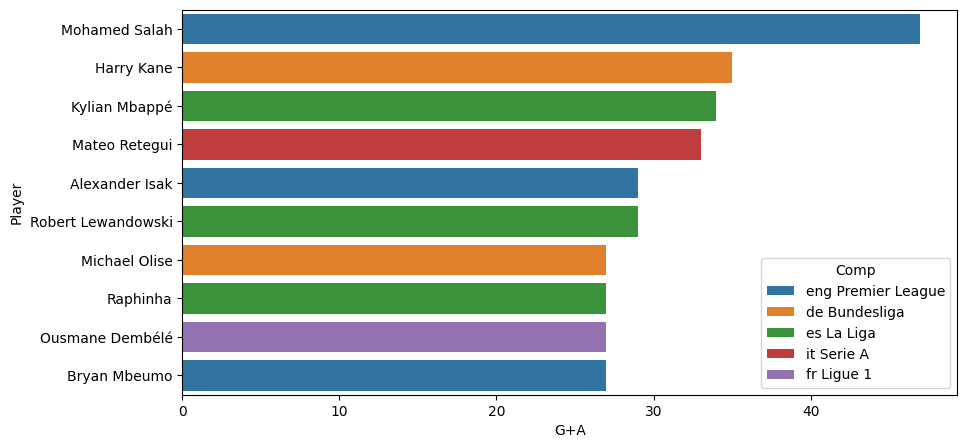

In [ ]:
#top 10 jogadores + ofensivos - Métricas = Gols + Assitências(G+A)
top_ofensivos = df.sort_values("G+A", ascending=False).head(10)[
    ["Player", "Squad", "Comp", "Pos", "G+A"]]
print(top_ofensivos)

#visualizar dados (gráfico de barra horizontal)
plt.figure(figsize=(10, 5)) #cria figura
sns.barplot(data=top_ofensivos, x="G+A", y ="Player", hue="Comp") #plotar barras
plt.show() #visualizar figura


                  Player           Squad                Comp Pos  Tkl+Int
962   Idrissa Gana Gueye         Everton  eng Premier League  MF      181
1823        Daniel Muñoz  Crystal Palace  eng Premier League  DF      167
434       Moisés Caicedo         Chelsea  eng Premier League  MF      163
2223    Antonee Robinson          Fulham  eng Premier League  DF      157
1161      Omar El Hilali        Espanyol          es La Liga  DF      157
125       Benjamin André           Lille          fr Ligue 1  MF      151
489              Carmona         Sevilla          es La Liga  DF      151
935      Morten Frendrup           Genoa          it Serie A  MF      149
1685   Noussair Mazraoui  Manchester Utd  eng Premier League  DF      149
2568     Nahuel Tenaglia          Alavés          es La Liga  DF      143


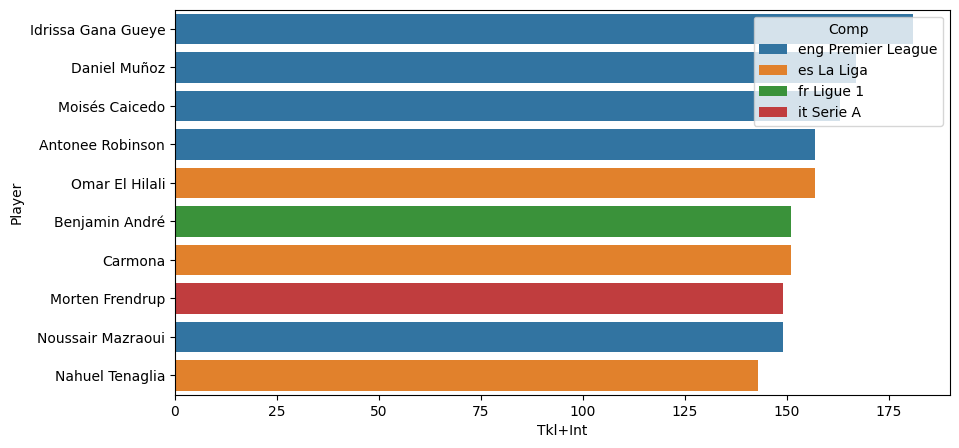

In [14]:
#top jogadores + defensivos - Botes + Interceptações("Tkl+Int")
top_ofensivos = df.sort_values("Tkl+Int", ascending=False).head(10)[
    ["Player", "Squad", "Comp", "Pos", "Tkl+Int"]]
print(top_ofensivos)

#visualizar dados (gráfico de barra horizontal)
plt.figure(figsize=(10, 5)) #cria figura
sns.barplot(data=top_ofensivos, x="Tkl+Int", y ="Player", hue="Comp") #plotar barras
plt.show() #visualizar figura

* Quais as melhores ligas?

In [15]:
#liga com maior qualidade DEFENSIVA
df.groupby("Comp")["Tkl+Int"].mean().sort_values(ascending=False)

Comp
eng Premier League    33.806620
es La Liga            30.745424
de Bundesliga         29.949187
fr Ligue 1            29.896926
it Serie A            27.015773
Name: Tkl+Int, dtype: float64

In [16]:
#liga com maior qualidade OFENSIVA
df.groupby("Comp")["G+A"].mean().sort_values(ascending=False)

Comp
eng Premier League    3.285714
de Bundesliga         3.262195
es La Liga            2.732113
fr Ligue 1            2.707052
it Serie A            2.523659
Name: G+A, dtype: float64

                      Player          Squad                Comp Pos  Saves
906             Mark Flekken      Brentford  eng Premier League  GK  150.0
972              Joan García       Espanyol          es La Liga  GK  140.0
914             Yahia Fofana         Angers          fr Ligue 1  GK  135.0
1449      Gautier Larsonneur  Saint-Étienne          fr Ligue 1  GK  132.0
1156          Sergio Herrera        Osasuna          es La Liga  GK  131.0
743            Yehvann Diouf          Reims          fr Ligue 1  GK  131.0
1743  Vanja Milinković-Savić         Torino          it Serie A  GK  129.0
874        Wladimiro Falcone          Lecce          it Serie A  GK  125.0
425             Marcin Bułka           Nice          fr Ligue 1  GK  120.0
2172          Aaron Ramsdale    Southampton  eng Premier League  GK  120.0


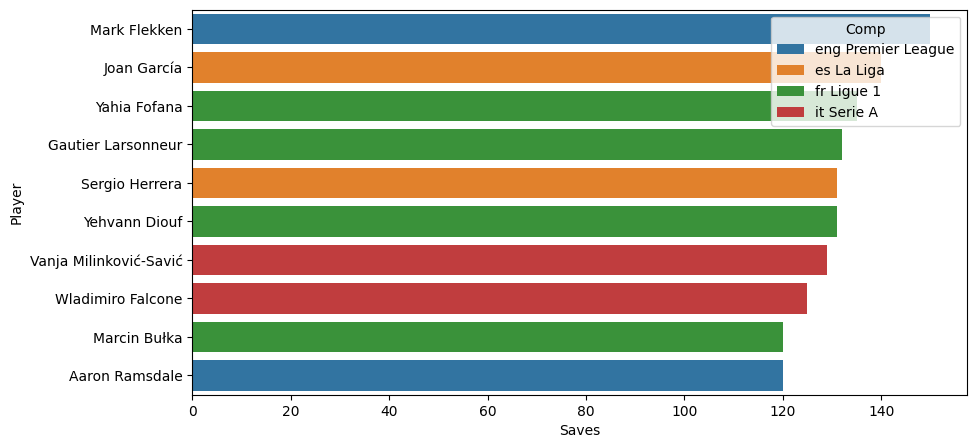

In [17]:
#liga com melhores goleiros
top_goleiros = df.sort_values("Saves", ascending=False).head(10)[
    ["Player", "Squad", "Comp", "Pos", "Saves"]]
print(top_goleiros)

#visualizar dados (gráfico de barra horizontal)
plt.figure(figsize=(10, 5)) #cria figura
sns.barplot(data=top_goleiros, x="Saves", y ="Player", hue="Comp") #plotar barras
plt.show() #visualizar figura

* Qual o melhor time da temporada?

In [19]:
#filtrando jogadores por posição
goleiros = df[df["Pos"] == "GK"]
defensores = df[df["Pos"] == "DF"]
meias = df[df["Pos"] == "MF"]
atacantes = df[df["Pos"] == "FW"]

In [21]:
#Top 1 goleiro (Saves)
melhor_goleiro = goleiros.sort_values("Saves", ascending=False).head(1)[
    ["Player", "Pos", "Squad", "Comp"]
]
display(melhor_goleiro)

,Player,Pos,Squad,Comp
906,Mark Flekken,GK,Brentford,eng Premier League


In [27]:
#Top 3 defensores (Tkl+Int)
melhores_defensores = defensores.sort_values("Tkl+Int", ascending=False).head(3)[
    ["Player", "Pos", "Squad", "Comp"]
]
display(melhores_defensores)

,Player,Pos,Squad,Comp
1823,Daniel Muñoz,DF,Crystal Palace,eng Premier League
1161,Omar El Hilali,DF,Espanyol,es La Liga
2223,Antonee Robinson,DF,Fulham,eng Premier League


In [24]:
#Top 5 meia (KP)
melhores_meias = meias.sort_values("KP", ascending=False).head(5)[
    ["Player", "Pos", "Squad", "Comp"]
]
display(melhores_meias)

,Player,Pos,Squad,Comp
200,Alex Baena,MF,Villarreal,es La Liga
891,Bruno Fernandes,MF,Manchester Utd,eng Premier League
2033,Cole Palmer,MF,Chelsea,eng Premier League
1356,Joshua Kimmich,MF,Bayern Munich,de Bundesliga
896,Enzo Fernández,MF,Chelsea,eng Premier League


In [25]:
#Top 2 atacantes (G+A)
melhores_atacantes = atacantes.sort_values("G+A", ascending=False).head(2)[
    ["Player", "Pos", "Squad", "Comp"]
]
display(melhores_atacantes)

,Player,Pos,Squad,Comp
2304,Mohamed Salah,FW,Liverpool,eng Premier League
1317,Harry Kane,FW,Bayern Munich,de Bundesliga


In [ ]:
#concatenar dataframes
dream_team = pd.concat(
    [melhor_goleiro, melhores_defensores, melhores_meias, melhores_atacantes]
    )

#visualizar dream team (FORMAÇÃO 3-5-2)
print("\n DREAM TEAM 2024/25")
display(dream_team)


 DREAM TEAM 2024/25


,Player,Pos,Squad,Comp
906,Mark Flekken,GK,Brentford,eng Premier League
1823,Daniel Muñoz,DF,Crystal Palace,eng Premier League
1161,Omar El Hilali,DF,Espanyol,es La Liga
2223,Antonee Robinson,DF,Fulham,eng Premier League
200,Alex Baena,MF,Villarreal,es La Liga
891,Bruno Fernandes,MF,Manchester Utd,eng Premier League
2033,Cole Palmer,MF,Chelsea,eng Premier League
1356,Joshua Kimmich,MF,Bayern Munich,de Bundesliga
896,Enzo Fernández,MF,Chelsea,eng Premier League
2304,Mohamed Salah,FW,Liverpool,eng Premier League
